# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [3]:
data = pd.read_csv('weight-height.csv')
data.head()
male_df = data.loc[data['Gender'] == 'Male']
female_df = data.loc[data['Gender'] == 'Female']

# male_df =  None
# female_df =  None
male_df
print("Male Height Mean:", male_df['Height'].mean())
print("Male Height SD:", male_df['Height'].std())

print("Male Weight Mean:", male_df['Weight'].mean())
print("Male Weight SD:", male_df['Weight'].std())

print("Female Height Mean:", female_df['Height'].mean())
print("Female Height SD:", female_df['Height'].std())

print("Female Weight Mean:", female_df['Weight'].mean())
print("Female Weight SD:", female_df['Weight'].std())
  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height Mean: 69.02634590621741
Male Height SD: 2.863362228660647
Male Weight Mean: 187.0206206581932
Male Weight SD: 19.7811545167638
Female Height Mean: 63.70877360342507
Female Height SD: 2.696284015765054
Female Weight Mean: 135.86009300746835
Female Weight SD: 19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


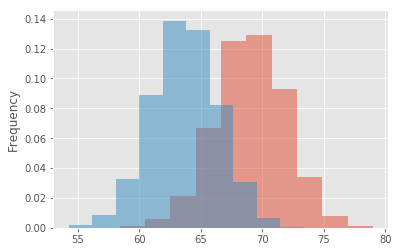

In [4]:
male_df['Height'].plot.hist(bins=10, normed=True, alpha = 0.5)
female_df['Height'].plot.hist(bins=10, normed=True,  alpha = 0.5)

In [ ]:
# Record your observations - are these inline with your personal observations?



#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

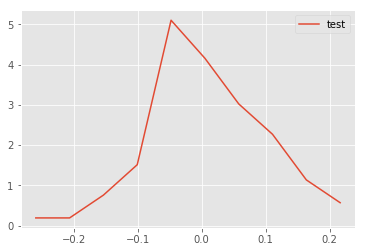

In [17]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k]=0.5*(bins[k] + bins[k+1])
        pdfy[k]=n[k]
        
    return pdfx, pdfy
    

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

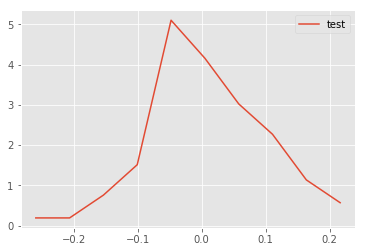

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


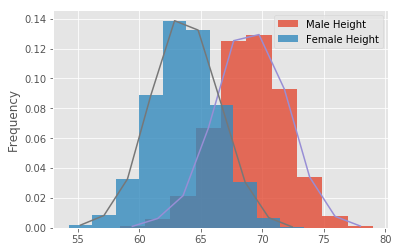

In [19]:
male_df['Height'].plot.hist(bins=10, normed=True, alpha = 0.8, label="Male Height")
female_df['Height'].plot.hist(bins=10, normed=True,  alpha = 0.8, label="Female Height")
plt.legend()
x,y=density(male_df.Height)
plt.plot(x,y)
x,y=density(female_df.Height)
plt.plot(x,y)


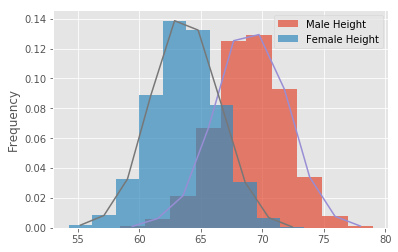

#### Repeat above exerice for male and female weights

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


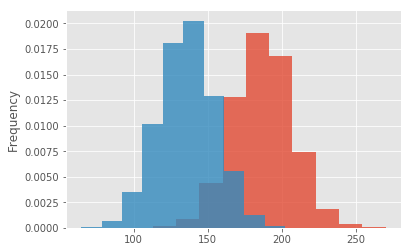

In [25]:
male_df['Weight'].plot.hist(bins=10, normed=True, alpha = 0.8, label="Male Weight")
female_df['Weight'].plot.hist(bins=10, normed=True, alpha = 0.8, label="Female Weight")

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


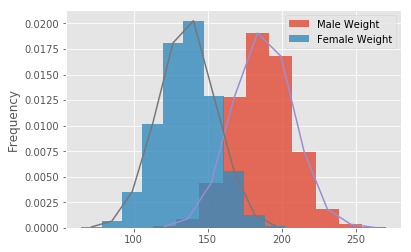

In [26]:
male_df['Weight'].plot.hist(bins=10, normed=True, alpha = 0.8, label="Male Weight")
female_df['Weight'].plot.hist(bins=10, normed=True, alpha = 0.8, label="Female Weight")
plt.legend()
x, y = density(male_df['Weight'])
plt.plot(x,y)
x, y = density(female_df['Weight'])
plt.plot(x,y)


#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'heights pdf with seaborn')

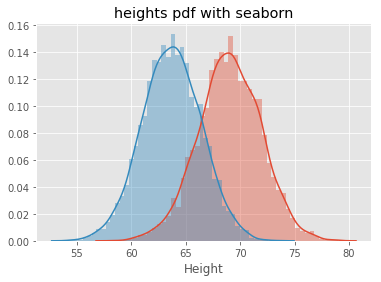

In [27]:
import seaborn as sns
sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])
plt.title('heights pdf with seaborn')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'weights pdf with seabron')

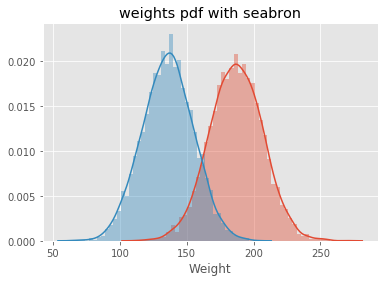

In [29]:
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])
plt.title('weights pdf with seabron')

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.